In [1]:
from astropy.io import fits
import astropy.units as u
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':"nearest"})
import os
from pathlib import Path
import numpy as np

spcdir = Path('/groups/douglase/webbpsf-data/CGI/optics/F825'); print(spcdir)

lambda_m = 825e-9*u.m
D = 2.3633372*u.m

lamD = lambda_m/D
as_per_lamD = lamD * 180/np.pi * 3600

/groups/douglase/webbpsf-data/CGI/optics/F825


# Add pupil scales to the apodizer files.

(1002, 1002)
(1002, 1002)


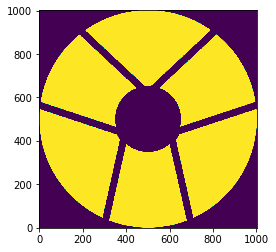

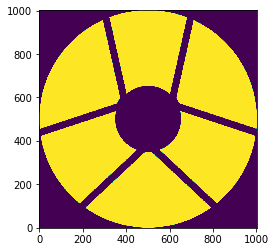

In [2]:
pupil_fnames = [spcdir/'pupil_SPC-20181220_1k.fits', spcdir/'pupil_SPC-20181220_1k_rotated.fits']
pupil_diam = 2.3633372*u.m
pupil_diam_pix = 1000*u.pixel

for fname in pupil_fnames:
    spc825pup = fits.open(fname, mode='update')

    spc825pup_data = spc825pup[0].data

    spc825pup[0].header['PUPLDIAM'] = pupil_diam.value
    spc825pup[0].header['PUPLSCAL'] = pupil_diam.value/pupil_diam_pix.value
    spc825pup[0].header['PIXSCALE'] = pupil_diam.value/pupil_diam_pix.value

    spc825pup.close()
    
    plt.figure()
    plt.imshow(spc825pup_data)

    print(spc825pup_data.shape)

# Add pupil scales to the apodizer files.

(1001, 1001)
(1001, 1001)


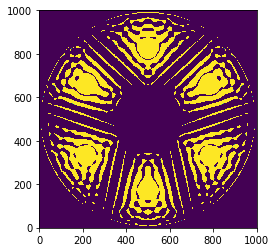

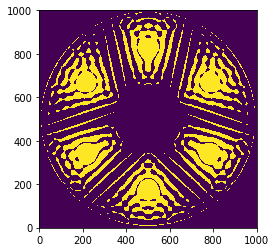

In [3]:
spm_fnames = [spcdir/'SPM_SPC-20181220_1000_rounded9_gray.fits', spcdir/'SPM_SPC-20181220_1000_rounded9_gray_rotated.fits']
pupil_plane_diam = 46.2987e-3*u.m
pupil_plane_diam_pix = 1000.0*u.pixel
pxscl = 1.7000e-5

for fname in spm_fnames:
    spc825spm = fits.open(fname, mode='update')

    spc825spm_data = spc825spm[0].data

    spc825spm[0].header['PUPLDIAM'] = pupil_plane_diam.value
    spc825spm[0].header['PUPLSCAL'] = pxscl
    spc825spm[0].header['PIXSCALE'] = pxscl

    spc825spm.close()
    
    plt.figure()
    plt.imshow(spc825spm_data)

    print(spc825spm_data.shape)

# Add pixel scales to the FPM files.

0.0014400692813014962 (2002, 2002)
0.00360017320325374 (821, 821)


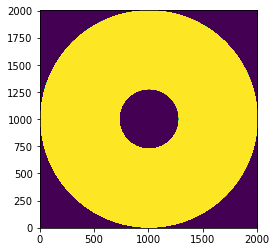

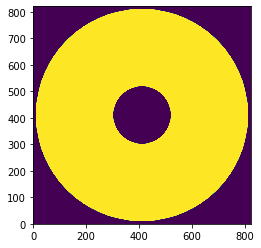

In [5]:
fpm_fnames = [spcdir/'FPM_res50_SPC-20181220.fits', spcdir/'fpm_0.05lamdivD.fits']
fpm_sampling = [(lamD/50*u.radian).to(u.arcsecond), (0.05*lamD*u.radian).to(u.arcsecond)]

for i,fname in enumerate(fpm_fnames):
    spc825fpm = fits.open(fname, mode='update')

    spc825fpm[0].header['PIXELSCL'] = fpm_sampling[i].value

    print(spc825fpm[0].header['PIXELSCL'], spc825fpm[0].data.shape)
    plt.figure()
    plt.imshow(spc825fpm[0].data)
    
    spc825fpm.close()

# Add pupil scales to the lyot stop files.

1.7e-05 (1002, 1002)
1.7e-05 (1002, 1002)
3.326953125e-05 (512, 512)
3.326953125e-05 (512, 512)


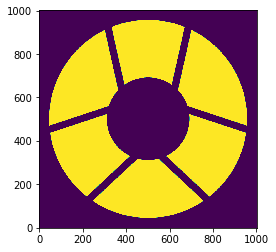

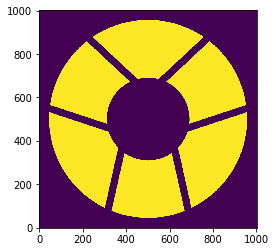

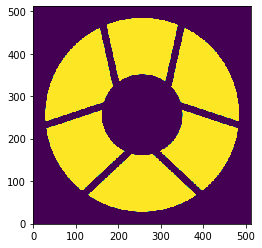

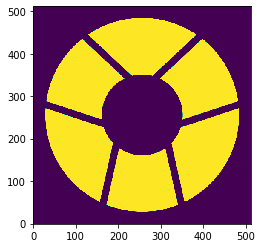

In [7]:
ls_fnames = [spcdir/'LS_SPC-20181220_1k.fits', spcdir/'LS_SPC-20181220_1k_rotated.fits',
             spcdir/'lyotstop_0.5mag.fits', spcdir/'lyotstop_0.5mag_rotated.fits']
pxscl = 1.7000e-5
ls_sampling = [pxscl, pxscl, 
               pxscl*1002/512, pxscl*1002/512]

for i,fname in enumerate(ls_fnames):
    spc825ls = fits.open(fname, mode='update')

    spc825ls[0].header['PIXELSCL'] = ls_sampling[i]

    print(spc825ls[0].header['PIXELSCL'], spc825ls[0].data.shape)
    plt.figure()
    plt.imshow(spc825ls[0].data)
    
    spc825ls.close()

## Alter the DM fits files.

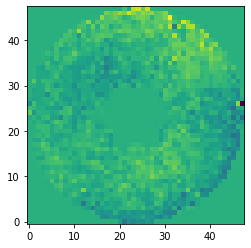

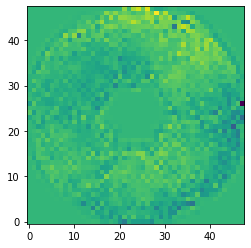

In [8]:
dm_fnames = [spcdir/'spc-wide_with_aberrations_dm1.fits', spcdir/'spc-wide_with_aberrations_dm2.fits']
dm_sampling_m = 0.9906e-3*u.m 

for fname in dm_fnames:
    dm = fits.open(fname, mode='update')
    
    dm[0].header['PUPLDIAM'] = dm_sampling_m.value * 48
    dm[0].header['PUPLSCAL'] = dm_sampling_m.value
    dm[0].header['PIXSCALE'] = dm_sampling_m.value

    dm_data = dm[0].data
    dm_hdr = dm[0].header

    dm.close()
    
    plt.figure()
    plt.imshow(dm_data)